## **Examen de cinturón AML – Opción A**
En este examen, trabajarás con un dataset reciente de complejidad baja, donde primero realizarás un análisis no supervisado utilizando K-means o PCA, y luego modelarás el conjunto de datos utilizando un Perceptrón Multicapa (MLP). El objetivo es aplicar técnicas de clustering o reducción de dimensionalidad para analizar los datos, seguido de la implementación de un modelo MLP para realizar predicciones.

## **Dataset**
El dataset utilizado para este examen es el **«Customer Personality Analysis»** disponible en Kaggle. Este conjunto de datos contiene información demográfica y de comportamiento de clientes, con el objetivo de agruparlos y predecir sus patrones de compra.

Enlace al dataset: https://www.kaggle.com/imakash3011/customer-personality-analysis


## **Instrucciones**


## **1. Exploración y preprocesamiento de datos**
* Carga y explora el dataset para identificar las variables más relevantes. Las características incluyen información demográfica como la edad, el ingreso, el estado civil, y datos de comportamiento de compra, como la cantidad gastada en diferentes productos.
* Asegúrate de manejar los valores nulos y realizar un preprocesamiento adecuado, como la normalización de los datos para el análisis posterior.

### **Carga de datos**

In [7]:
from google.colab import files

# Subir el archivo ZIP
print("Sube el archivo ZIP descargado de Kaggle:")
uploaded = files.upload()


Sube el archivo ZIP descargado de Kaggle:


Saving archive (7).zip to archive (7) (1).zip


In [8]:
import zipfile

# Get the list of uploaded files (from the 'uploaded' dictionary).
uploaded_files = list(uploaded.keys())

# Check if any files were uploaded.
if uploaded_files:
    # Assume the first uploaded file is the ZIP file.
    zip_file_name = uploaded_files[0]

    # Extract the ZIP file.
    with zipfile.ZipFile(zip_file_name, "r") as zip_ref:
        zip_ref.extractall()

    print(f"Extracted {zip_file_name} successfully!")
else:
    print("No files were uploaded.")

# Confirm the extracted files.
!ls


Extracted archive (7) (1).zip successfully!
'archive (7) (1).zip'  'archive (7).zip'   marketing_campaign.csv   sample_data


In [20]:
import pandas as pd

# Cargar el archivo CSV especificando el delimitador como tabulador
df = pd.read_csv("marketing_campaign.csv", sep="\t")

# Mostrar las primeras filas para verificar
df.head()



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### **Exploracion del Dataset**

In [19]:
# Información general del DataFrame
print("El dataframe tiene la siguiente cantidad de filas y columnas:", df.shape)

print("\nInformación general del DataFrame:")
print(df.info())




El dataframe tiene la siguiente cantidad de filas y columnas: (2240, 29)

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non

#### **Manejo de valores nulos**

Decidí **eliminar las filas con valores nulos en `Income`** por las siguientes razones:

- **Importancia de la variable**: `Income` es crucial para el análisis y modelado, y los valores nulos podrían distorsionar los resultados de los modelos de Machine Learning.
- **Poco impacto en el dataset**: Solo el 1% de los registros tiene valores nulos en `Income`, por lo que eliminarlos no afectará significativamente el análisis.
- **Evitar sesgo**: Imputar los valores podría introducir sesgo, ya que asumir un ingreso promedio no refleja la diversidad de los datos y puede afectar la precisión de los modelos.


In [22]:
print(df.isnull().sum())



ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [26]:
# Eliminar las filas con valores nulos en la columna 'Income'
df = df.dropna(subset=['Income'])

# Verificar que no haya valores nulos en el dataset
print(df.isnull().sum())


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [28]:
df.shape

(2216, 29)

#### **Manejo de valores duplicados**


Al verificar la columna ID, encontramos que no existen registros duplicados. Por lo tanto, no se realizó ninguna acción para eliminar duplicados, ya que todos los valores en esta columna son únicos. Esto asegura que cada cliente esté representado de manera única en el dataset, manteniendo la integridad de los datos para el análisis y modelado.

In [30]:
# Verificar si hay duplicados en la columna 'ID'
duplicates = df[df.duplicated(subset='ID')]

# Mostrar los duplicados
print(f"Cantidad de registros duplicados: {len(duplicates)}")
print(duplicates)


Cantidad de registros duplicados: 0
Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]


#### **Manejo de outliers**

Se aplica técnica de **capping** utilizando el **Interquartile Range (IQR)** para manejar los outliers sin eliminarlos. Esta estrategia ajusta los valores extremos fuera del rango intercuartílico a los límites inferior o superior correspondientes, preservando la integridad del dataset sin perder información valiosa. Al aplicar esta técnica, los outliers no se eliminan, sino que se limitan, lo que minimiza su impacto en los análisis posteriores, como el clustering o la reducción de dimensionalidad, sin afectar la riqueza de los datos.

In [33]:
import numpy as np
import pandas as pd

# Select only numeric columns for outlier handling
numeric_df = df.select_dtypes(include=np.number)

# Calculamos los percentiles 25 y 75
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)

# Calculamos el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Establecemos los límites superior e inferior para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aplicamos un "capping" a los valores fuera de los límites
df_capped = df.copy()
for col in numeric_df.columns:
    df_capped[col] = np.clip(df_capped[col], lower_bound[col], upper_bound[col])


# Verificamos si se han realizado transformaciones
print(df_capped.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.867329   51874.493231     0.441787     0.505415   
std     3249.376275    11.770856   21059.740890     0.536896     0.544181   
min        0.000000  1932.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  118350.500000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   303.272789    21.569043       151.268389   
std      28.948352   331.811951    26.923702       179.016404   
min       0.000000     0.000000     0.000000  

#### **Normalizacion**

Se realizó la **estandarización** de las columnas numéricas del conjunto de datos utilizando `StandardScaler` de `sklearn`. El objetivo de esta transformación fue ajustar las variables para que tengan una **media de 0** y una **desviación estándar de 1**, lo cual es crucial para algoritmos como **K-means** y **PCA**, que son sensibles a la escala de las características.

Sin estandarización, las variables con rangos más grandes (como `Income` o `MntWines`) dominarían el cálculo de distancias en K-means o las componentes principales en PCA, lo que podría sesgar los resultados.

In [34]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include=np.number)

# Inicializar el estandarizador
scaler = StandardScaler()

# Aplicar la estandarización
df_scaled = df.copy()
df_scaled[numeric_df.columns] = scaler.fit_transform(numeric_df)

# Verificamos las estadísticas descriptivas después de la estandarización
print(df_scaled.describe())


                 ID    Year_Birth        Income       Kidhome      Teenhome  \
count  2.216000e+03  2.216000e+03  2.216000e+03  2.216000e+03  2.216000e+03   
mean   7.695409e-17  6.450516e-15  5.210433e-17 -1.122247e-16  4.168346e-17   
std    1.000226e+00  1.000226e+00  1.000226e+00  1.000226e+00  1.000226e+00   
min   -1.720212e+00 -6.327410e+00 -2.007250e+00 -8.230393e-01 -9.289722e-01   
25%   -8.537729e-01 -8.195377e-01 -6.732620e-01 -8.230393e-01 -9.289722e-01   
50%   -3.997156e-02  9.844093e-02 -3.439972e-02 -8.230393e-01 -9.289722e-01   
75%    8.721785e-01  6.826092e-01  6.466600e-01  1.039938e+00  9.090657e-01   
max    1.724611e+00  2.268209e+00  2.441328e+01  2.902916e+00  2.747104e+00   

            Recency      MntWines     MntFruits  MntMeatProducts  \
count  2.216000e+03  2.216000e+03  2.216000e+03     2.216000e+03   
mean  -2.404815e-18 -3.366741e-17 -7.214446e-18    -5.771557e-17   
std    1.000226e+00  1.000226e+00  1.000226e+00     1.000226e+00   
min   -1.693488e

#### **Seleccion de caracteristicas**

Algunas columnas pueden ser irrelevantes o redundantes para el análisis de clustering y segmentación de clientes. Se agregan las columnas "edad" y "antiguedad" para manejo de caracteristicas.

In [37]:
# Calcular la edad del cliente
df['Edad'] = pd.to_datetime('today').year - df['Year_Birth']

# Calcular la antigüedad del cliente (en años)
# Changed the format to match the actual date format in 'Dt_Customer' column
df['Antiguedad'] = (pd.to_datetime('today') - pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')).dt.days / 365

# Verificar que las columnas se han añadido correctamente
df[['ID', 'Year_Birth', 'Edad', 'Dt_Customer', 'Antiguedad']].head()


,ID,Year_Birth,Edad,Dt_Customer,Antiguedad
0,5524,1957,67,04-09-2012,12.304110
1,2174,1954,70,08-03-2014,10.797260
2,4141,1965,59,21-08-2013,11.342466
3,6182,1984,40,10-02-2014,10.868493
4,5324,1981,43,19-01-2014,10.928767


In [41]:
import pandas as pd

# Selección de columnas relevantes para el clustering
columns_to_keep = [
    'Income',
    'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'Complain',
    'Edad',
    'Antiguedad'
]

# Filtrar el dataframe para mantener solo las columnas relevantes
df_selected = df[columns_to_keep]

# Mostrar las primeras filas para verificar la selección de columnas
print(df_selected.head())

# Verifica el tipo de datos de las columnas seleccionadas
print(df_selected.dtypes)


    Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  58138.0       58       635         88              546              172   
1  46344.0       38        11          1                6                2   
2  71613.0       26       426         49              127              111   
3  26646.0       26        11          4               20               10   
4  58293.0       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumWebPurchases  NumCatalogPurchases  \
0                88            88                8                   10   
1                 1             6                1                    1   
2                21            42                8                    2   
3                 3             5                2                    0   
4                27            15                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  \
0        

#### **Tratamiento de variables categoricas**


**One-Hot Encoding** es la opción más adecuada para convertir variables categóricas en formato numérico, ya que transforma cada categoría en una columna binaria (0 o 1), evitando que los modelos, como K-means o PCA, malinterpreten las categorías como variables ordinales o continuas. Esta técnica es útil cuando las categorías no tienen un orden implícito, como en las columnas Education y Marital_Status.

In [42]:
import pandas as pd

# Supongamos que df es el DataFrame ya cargado y preprocesado

# Selección de columnas relevantes para el clustering (como en tu código anterior)
columns_to_keep = [
    'Income',
    'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'Complain',
    'Edad',
    'Antiguedad',
    'Education',  # Variable categórica
    'Marital_Status'  # Variable categórica
]

# Filtrar el DataFrame para mantener solo las columnas relevantes
df_selected = df[columns_to_keep]

# Aplicar One-Hot Encoding a las variables categóricas 'Education' y 'Marital_Status'
df_selected = pd.get_dummies(df_selected, columns=['Education', 'Marital_Status'], drop_first=True)

# Mostrar las primeras filas del DataFrame después de One-Hot Encoding
print(df_selected.head())

# Verificar los tipos de datos para asegurarnos de que las columnas categóricas fueron convertidas correctamente
print(df_selected.dtypes)


    Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  58138.0       58       635         88              546              172   
1  46344.0       38        11          1                6                2   
2  71613.0       26       426         49              127              111   
3  26646.0       26        11          4               20               10   
4  58293.0       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumWebPurchases  NumCatalogPurchases  ...  \
0                88            88                8                   10  ...   
1                 1             6                1                    1  ...   
2                21            42                8                    2  ...   
3                 3             5                2                    0  ...   
4                27            15                5                    3  ...   

   Education_Graduation  Education_Master  Educati

## **2. Análisis no supervisado**
* **K-means:** Si seleccionas K-means, determina el número óptimo de clusters utilizando el método del codo o el silhouette score. Agrupa a los clientes en diferentes clusters y analiza cómo se dividen según sus características demográficas y de compra.
* **PCA:** Si eliges PCA, realiza una reducción de dimensionalidad para capturar al menos el 90% de la varianza explicada. Proyecta los datos en los primeros componentes principales y visualiza cómo se agrupan los clientes en el nuevo espacio de características.

* **K-means y su capacidad para segmentar:** es un algoritmo diseñado para identificar y formar grupos (clusters) en los datos. Al determinar el número óptimo de clusters con el **Método del Codo** y el **Silhouette Score**, se puede identificar cómo los datos se agrupan de manera efectiva, proporcionando segmentaciones claras y fáciles de interpretar.

* **PCA**, aunque se logra una excelente reducción de dimensionalidad, los componentes principales no siempre corresponden a agrupaciones explícitas de datos, sino más bien a direcciones de varianza. Es útil para visualizar patrones, pero no genera clusters tangibles.

Si se busca segmentar el conjunto de datos en **grupos coherentes**, **K-means** es la mejor opción. **PCA**, aunque útil para visualización y reducción de dimensiones, no genera directamente grupos de datos.

### **Método k-means**

El **Método del Codo** busca encontrar un equilibrio entre minimizar el SSE (lograr clústeres compactos) y evitar el sobreajuste (usar demasiados clústeres). El punto del "codo" indica el número de clústeres que ofrece una buena agrupación sin añadir complejidad innecesaria. En este caso, ese número es 4.

El **Silhouette Score** busca maximizar la cohesión dentro de los clústeres y la separación entre ellos. Este método alcanza su valor máximo en 3 clústeres, seguido muy de cerca por 4 clústeres. Luego, el score disminuye considerablemente. Esto sugiere que 3 o 4 clústeres son las mejores opciones para este conjunto de datos.

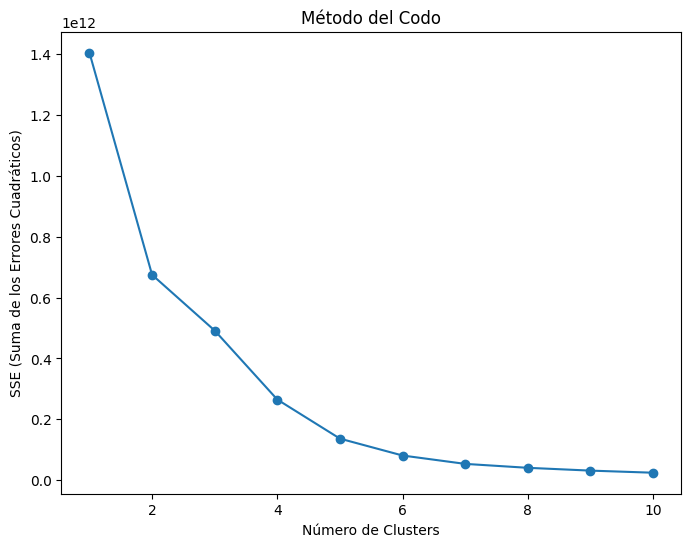

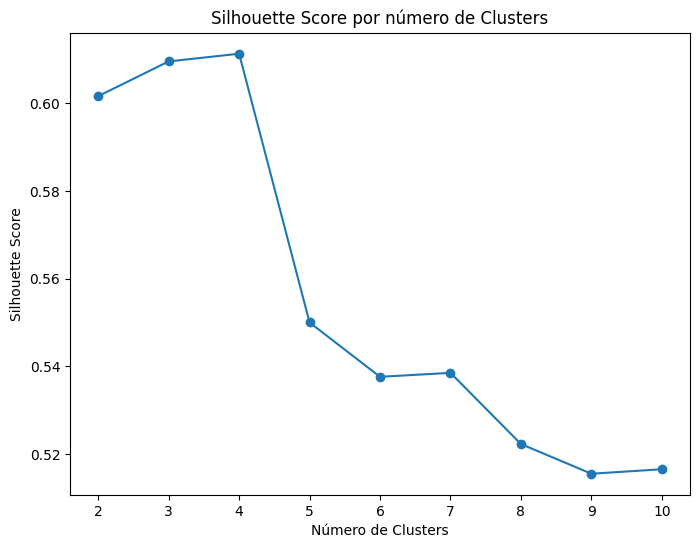

In [47]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Método del Codo
sse = []
k_range = range(1, 11)  # probar entre 1 y 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_selected)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE (Suma de los Errores Cuadráticos)')
plt.show()

# Método del Silhouette Score
silhouette_scores = []
for k in k_range[1:]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_selected)
    score = silhouette_score(df_selected, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar el Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(k_range[1:], silhouette_scores, marker='o')
plt.title('Silhouette Score por número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()


### **Método PCA**

La gráfica muestra cómo se distribuyen las muestras a lo largo del primer componente principal. En general, se observa una gran concentración de puntos cerca del centro (alrededor de 0 en el eje Y), con algunos valores atípicos (outliers) que se alejan significativamente.
Los valores de "Varianza explicada por los primeros componentes" y "Total varianza explicada" nos dicen que el primer componente principal explica prácticamente el 100% de la varianza total de los datos originales.

Varianza explicada por los primeros componentes: [0.999815]
Total varianza explicada: 0.9998149995332315


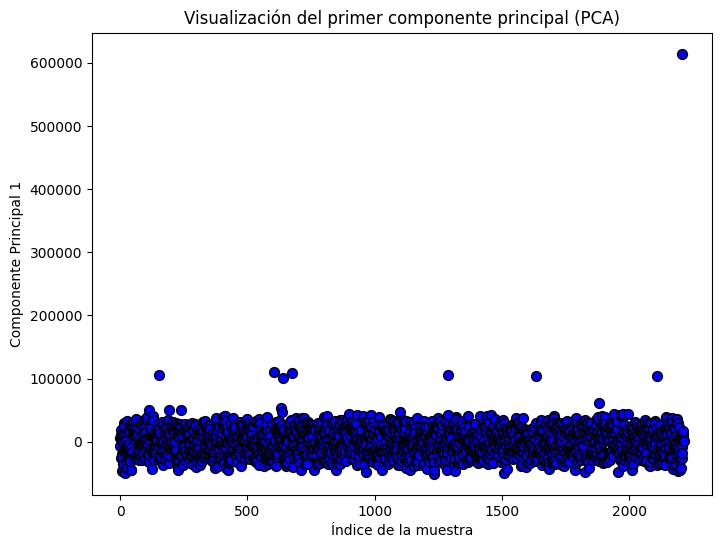

In [49]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducción de dimensionalidad (capturar al menos el 90% de la varianza)
pca = PCA(n_components=0.90, random_state=42)
df_pca = pca.fit_transform(df_selected)

# Mostrar la varianza explicada
print(f"Varianza explicada por los primeros componentes: {pca.explained_variance_ratio_}")
print(f"Total varianza explicada: {sum(pca.explained_variance_ratio_)}")

# Gráfico de dispersión con el primer componente principal
# Since we only have one component, we plot it against a range of values
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df_pca)), df_pca[:, 0], c='blue', edgecolor='k', s=50)
plt.title('Visualización del primer componente principal (PCA)')
plt.xlabel('Índice de la muestra')
plt.ylabel('Componente Principal 1')
plt.show()


## **3. Modelado con MLP**
* Implementa un Perceptrón Multicapa (MLP) para predecir las compras futuras de los clientes o su probabilidad de realizar una compra en una categoría específica de productos.
* Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de tener una proporción adecuada de cada clase en el conjunto de datos.
* Discute la arquitectura de tu MLP, incluyendo el número de capas ocultas, el número de neuronas en cada capa, y las funciones de activación utilizadas.

In [54]:
import pandas as pd

# Crear una columna binaria para predecir la compra en una categoría (por ejemplo, vino)
df_selected['Compra_Vino'] = (df_selected['MntWines'] > 50).astype(int)  # Umbral de 50 para considerar una compra


In [55]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y el target (y)
X = df_selected.drop(columns=['Compra_Vino'])  # Eliminar la columna target
y = df_selected['Compra_Vino']  # La columna target

# Dividir el dataset en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [56]:
from sklearn.neural_network import MLPClassifier

# Definir el modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', max_iter=500, random_state=42)

# Entrenar el modelo
mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=500, random_state=42)

## **4. Evaluación del modelo**
* Evalúa el modelo MLP utilizando métricas de clasificación como la precisión, el recall, el F1-score y la matriz de confusión. Asegúrate de comparar estas métricas entre el conjunto de entrenamiento y el conjunto de prueba para identificar cualquier posible sobreajuste.
* Visualiza las curvas de aprendizaje que muestren la pérdida y la precisión a lo largo del entrenamiento.

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predicciones en el conjunto de prueba
y_pred = mlp.predict(X_test)

# Evaluación con métricas
print("Precisión:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


Precisión: 1.0
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       444

    accuracy                           1.00       444
   macro avg       1.00      1.00      1.00       444
weighted avg       1.00      1.00      1.00       444

Matriz de confusión:
 [[444]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


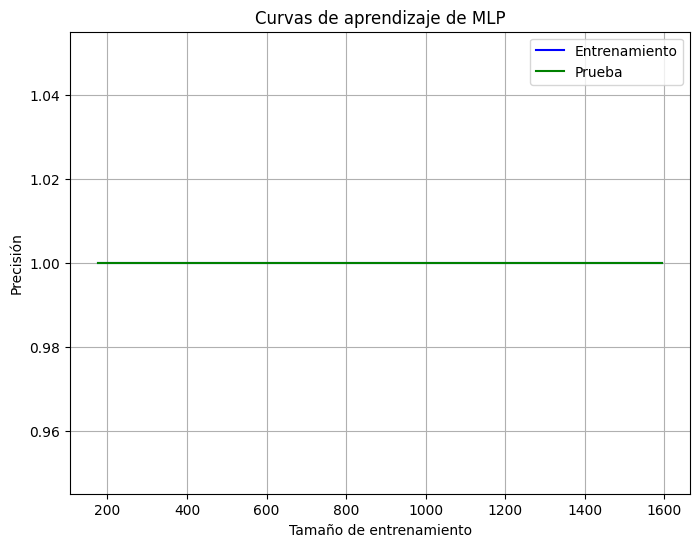

In [58]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Obtener las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(mlp, X, y, cv=5, n_jobs=-1, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9])

# Graficar las curvas de aprendizaje
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Entrenamiento', color='blue')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Prueba', color='green')
plt.title("Curvas de aprendizaje de MLP")
plt.xlabel("Tamaño de entrenamiento")
plt.ylabel("Precisión")
plt.legend()
plt.grid()
plt.show()


## **5. Discusión y análisis**


1. Reflexiona sobre los resultados del análisis no supervisado y el modelo MLP. ¿Qué insights obtuviste de los clusters o los componentes principales? ¿Cómo se relacionan con el comportamiento de los clientes?

    Las respuestas se encuentran en los respectivos apartados

2. Discute el rendimiento del modelo MLP. ¿Es adecuado para este tipo de datos? ¿Cómo podrías mejorarlo?

El resultado que obtenido muestra una precisión perfecta de 1.0 en el modelo, lo que significa que el modelo está prediciendo correctamente todas las clases del conjunto de prueba. Este comportamiento también puede ser una señal de sobreajuste o un problema en la distribución de las clases.

Si las clases están muy desbalanceadas (por ejemplo, si la mayoría de los clientes no compran un producto en una categoría específica), el modelo puede predecir siempre la clase mayoritaria (en este caso, probablemente la clase 0, indicando que no compraron). Esto podría llevar a una precisión muy alta sin que el modelo esté aprendiendo realmente a predecir las compras de forma efectiva.

Un solo valor en el conjunto de prueba: Si el conjunto de prueba contiene solo una clase (por ejemplo, todos los clientes en el conjunto de prueba no realizaron compras en la categoría específica), el modelo predecirá siempre esa clase, lo que generará una precisión del 100%. Esto es lo que parece estar sucediendo, ya que la matriz de confusión muestra que todas las predicciones son de la clase 0.

Falta de variabilidad en los datos de prueba: Es posible que el conjunto de prueba tenga muy poca variabilidad en términos de las clases, lo que hace que el modelo no tenga que generalizar correctamente. Esto podría suceder si el conjunto de entrenamiento y prueba no se ha distribuido correctamente o si hay problemas con los datos.

Pasos para investigar y mejorar:
Revisar la distribución de clases en los conjuntos de entrenamiento y prueba: Verifica si hay un desbalance de clases en el conjunto de datos, tanto en el entrenamiento como en el conjunto de prueba.
Asegurarse de que ambas clases estén representadas en el conjunto de prueba: Si el conjunto de prueba no tiene ejemplos de ambas clases, el modelo siempre predecirá la clase mayoritaria. Esto puede ocurrir si hay algún sesgo en cómo se dividieron los datos. Asegúrate de que ambas clases estén representadas de manera equilibrada en ambos conjuntos (entrenamiento y prueba).


Conclusión:
El modelo parece estar sobreajustando o no tiene suficiente variabilidad en los datos de prueba, lo que podría estar llevando a una precisión perfecta sin una buena generalización.

## **6. Entrega final**
* Entrega un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación del modelo y conclusiones. Asegúrate de que el informe sea claro y estructurado, con visualizaciones que apoyen tu análisis.